# Data loading, identifying missing values

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from google.colab import files
uploaded = files.upload()

Saving merged_df.csv to merged_df (1).csv


In [45]:
merged_df = pd.read_csv('merged_df.csv')
display(merged_df.head())
print(merged_df.shape)

,State,County,Percent of Children with Confirmed BLLs ³5 µg/dL,Built 2020 or later,Built 2000 to 2019,Built 1980 to 1999,Built 1960 to 1979,Built 1940 to 1959,Built 1939 or earlier,Lacking complete plumbing facilities,...,Income in the past 12 months at or above poverty level:!!18 to 64 years,Income in the past 12 months at or above poverty level:!!65 years and over,lat,lng,ADHD Percentage (Ever),ADHD Percentage (Current),ADHD Behavior Treatment(%),ADHD Medication(%),ADHD Meds or BT,Any Treatment
0,AL,AUTAUGA,NaN,0.018971,0.348779,0.233663,0.310232,0.058325,0.030030,0.5,...,0.567738,0.151584,32.5349,-86.6427,12.7,12.1,50.6,77.0,84.3,91.2
1,AL,BALDWIN,NaN,0.016696,0.460808,0.317366,0.156746,0.030529,0.017855,0.3,...,0.515682,0.202625,30.7277,-87.7226,12.7,12.1,50.6,77.0,84.3,91.2
2,AL,BARBOUR,NaN,0.000000,0.171020,0.400188,0.253661,0.104736,0.070395,0.2,...,0.491164,0.187543,31.8696,-85.3932,12.7,12.1,50.6,77.0,84.3,91.2
3,AL,BIBB,NaN,0.000000,0.269087,0.378022,0.226947,0.060487,0.065456,0.7,...,0.501439,0.183021,32.9986,-87.1265,12.7,12.1,50.6,77.0,84.3,91.2
4,AL,BLOUNT,0.0,0.003596,0.272173,0.367732,0.221302,0.092610,0.042588,0.6,...,0.532138,0.165438,33.9809,-86.5674,12.7,12.1,50.6,77.0,84.3,91.2


(2151, 66)


Descriptive Statistics for 'Percent of Children with Confirmed BLLs ³5 µg/dL':
count    1352.000000
mean        1.282089
std         2.204850
min         0.000000
25%         0.000000
50%         0.565000
75%         1.700000
max        39.000000
Name: Percent of Children with Confirmed BLLs ³5 µg/dL, dtype: float64


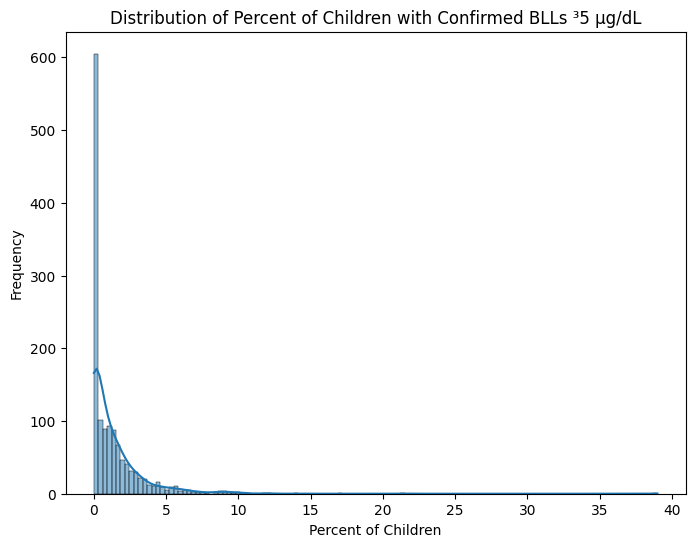

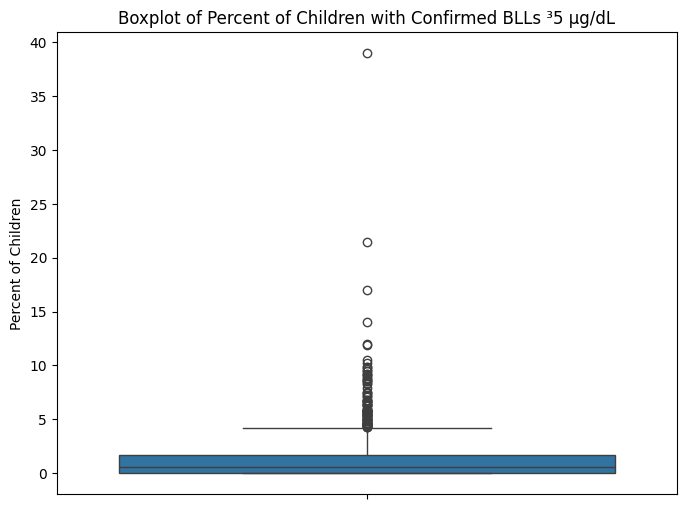

Percentage of missing values in 'Percent of Children with Confirmed BLLs ³5 µg/dL': 37.15%

Correlation Coefficients with 'Percent of Children with Confirmed BLLs ³5 µg/dL':
Percent of Children with Confirmed BLLs ³5 µg/dL    1.000000
Built 2020 or later                                -0.127451
Built 2000 to 2019                                 -0.299559
Built 1980 to 1999                                 -0.337339
Built 1960 to 1979                                 -0.033058
                                                      ...   
ADHD Percentage (Current)                          -0.175283
ADHD Behavior Treatment(%)                          0.031845
ADHD Medication(%)                                 -0.074684
ADHD Meds or BT                                    -0.101828
Any Treatment                                       0.002487
Length: 64, dtype: float64


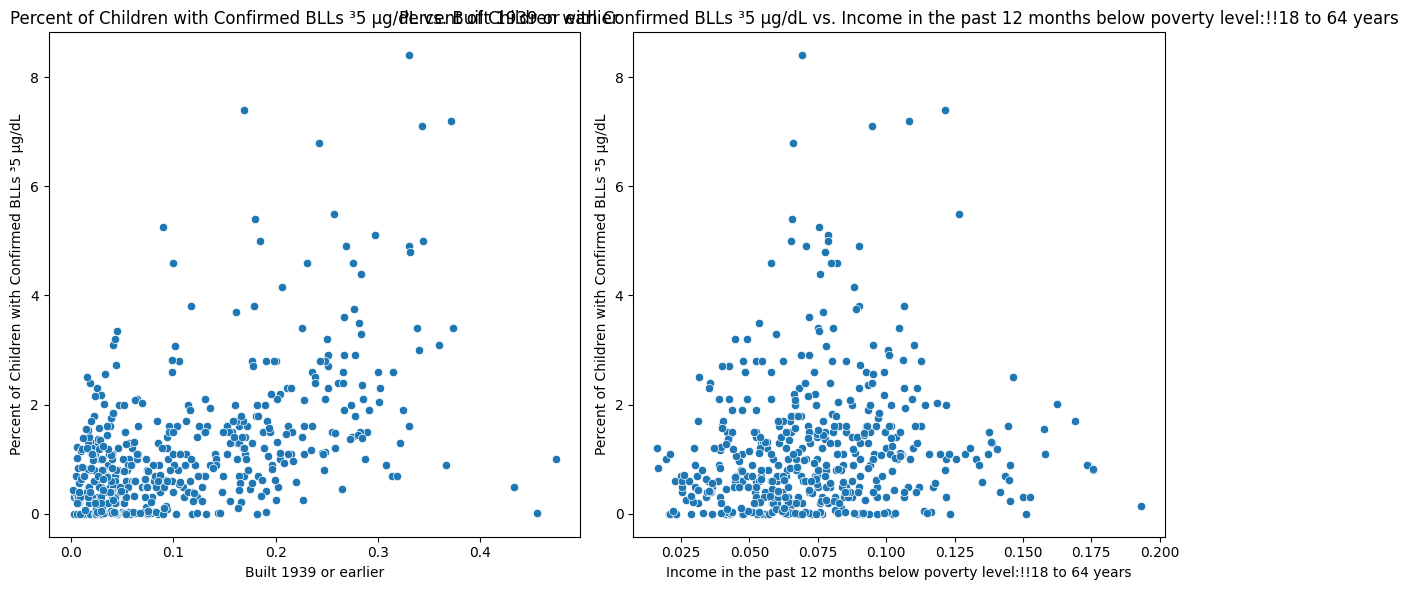

In [46]:
# 3. Analyze distribution of the 'Percent of Children with Confirmed BLLs ³5 µg/dL' column
bll_column = 'Percent of Children with Confirmed BLLs ³5 µg/dL'
bll_stats = merged_df[bll_column].describe()
print(f"Descriptive Statistics for '{bll_column}':\n{bll_stats}")

plt.figure(figsize=(8, 6))
sns.histplot(merged_df[bll_column].dropna(), kde=True)
plt.title('Distribution of Percent of Children with Confirmed BLLs ³5 µg/dL')
plt.xlabel('Percent of Children')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=merged_df[bll_column])
plt.title('Boxplot of Percent of Children with Confirmed BLLs ³5 µg/dL')
plt.ylabel('Percent of Children')
plt.show()

# 4. Determine the percentage of missing values
missing_percentage = merged_df[bll_column].isnull().sum() / len(merged_df) * 100
print(f"Percentage of missing values in '{bll_column}': {missing_percentage:.2f}%")

# 5. Explore relationships with other variables
numerical_cols = merged_df.select_dtypes(include=['number']).columns
correlations = merged_df[numerical_cols].corrwith(merged_df[bll_column].dropna())
print(f"\nCorrelation Coefficients with '{bll_column}':\n{correlations}")

# 6. Visualize
plt.figure(figsize=(12, 6))

for i, col in enumerate(['Built 1939 or earlier', 'Income in the past 12 months below poverty level:!!18 to 64 years']):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(x=col, y=bll_column, data=merged_df.dropna())
    plt.title(f'{bll_column} vs. {col}')
    plt.xlabel(col)
    plt.ylabel(bll_column)

plt.tight_layout()
plt.show()

# Data cleaning for features


In [47]:
# Identify columns (excluding the blood lead level column) with missing values
cols_with_missing = merged_df.columns[merged_df.isnull().any()].tolist()
cols_with_missing.remove('Percent of Children with Confirmed BLLs ³5 µg/dL')

# Impute missing values
for col in cols_with_missing:
    if pd.api.types.is_numeric_dtype(merged_df[col]): # for numerics
        median_val = merged_df[col].median()
        merged_df[col].fillna(median_val, inplace=True)
    else: # for non-numerics
       # Impute with the most frequent value (mode)
        mode_val = merged_df[col].mode()[0]
        merged_df[col].fillna(mode_val, inplace=True)

# Correct inconsistencies and errors and convert data type
for col in merged_df.columns:
    if 'Percent' in col or 'Percentage' in col:
        merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')
        merged_df[col] = merged_df[col].clip(lower=0, upper=100)
    elif col in ['lat', 'lng']:
      merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')
    elif merged_df[col].dtype == 'object' and not pd.api.types.is_numeric_dtype(merged_df[col]):
        merged_df[col] = merged_df[col].astype('category')

# Verify the cleaning steps
print("Missing values after imputation (excluding blood lead levels):")
missing_vals = merged_df[cols_with_missing].isnull().sum()
print(missing_vals)
print("\nData types of cleaned dataframe:")
print(merged_df.dtypes)

display(merged_df.head())

Missing values after imputation (excluding blood lead levels):
Built 2020 or later                                                                           0
Built 2000 to 2019                                                                            0
Built 1980 to 1999                                                                            0
Built 1960 to 1979                                                                            0
Built 1940 to 1959                                                                            0
Built 1939 or earlier                                                                         0
Lacking complete plumbing facilities                                                          0
Lacking complete kitchen facilities                                                           0
House PriceLess than $50,000                                                                  0
House Price$50,000 to $99,999                                            

<ipython-input-47-47557a8c6dde>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[col].fillna(median_val, inplace=True)


,State,County,Percent of Children with Confirmed BLLs ³5 µg/dL,Built 2020 or later,Built 2000 to 2019,Built 1980 to 1999,Built 1960 to 1979,Built 1940 to 1959,Built 1939 or earlier,Lacking complete plumbing facilities,...,Income in the past 12 months at or above poverty level:!!18 to 64 years,Income in the past 12 months at or above poverty level:!!65 years and over,lat,lng,ADHD Percentage (Ever),ADHD Percentage (Current),ADHD Behavior Treatment(%),ADHD Medication(%),ADHD Meds or BT,Any Treatment
0,AL,AUTAUGA,NaN,0.018971,0.348779,0.233663,0.310232,0.058325,0.030030,0.5,...,0.567738,0.151584,32.5349,-86.6427,12.7,12.1,50.6,77.0,84.3,91.2
1,AL,BALDWIN,NaN,0.016696,0.460808,0.317366,0.156746,0.030529,0.017855,0.3,...,0.515682,0.202625,30.7277,-87.7226,12.7,12.1,50.6,77.0,84.3,91.2
2,AL,BARBOUR,NaN,0.000000,0.171020,0.400188,0.253661,0.104736,0.070395,0.2,...,0.491164,0.187543,31.8696,-85.3932,12.7,12.1,50.6,77.0,84.3,91.2
3,AL,BIBB,NaN,0.000000,0.269087,0.378022,0.226947,0.060487,0.065456,0.7,...,0.501439,0.183021,32.9986,-87.1265,12.7,12.1,50.6,77.0,84.3,91.2
4,AL,BLOUNT,0.0,0.003596,0.272173,0.367732,0.221302,0.092610,0.042588,0.6,...,0.532138,0.165438,33.9809,-86.5674,12.7,12.1,50.6,77.0,84.3,91.2


# Data prep for model training


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Split data into training and prediction sets
df_train = merged_df[merged_df['Percent of Children with Confirmed BLLs ³5 µg/dL'].notnull()]

# Prepare features (X) and target (y)
X_train = df_train.drop(columns=['Percent of Children with Confirmed BLLs ³5 µg/dL'])
y_train = df_train['Percent of Children with Confirmed BLLs ³5 µg/dL']
X_predict = df_predict.drop(columns=['Percent of Children with Confirmed BLLs ³5 µg/dL'])

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['category', 'object']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['number']).columns.tolist()

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_train = encoder.fit_transform(X_train[categorical_cols])
encoded_predict = encoder.transform(X_predict[categorical_cols])

# Create new column names for one-hot encoded features
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Create dfs for encoded features
encoded_df_train = pd.DataFrame(encoded_train, columns=encoded_feature_names)
encoded_df_predict = pd.DataFrame(encoded_predict, columns=encoded_feature_names)


# Handle missing categories in prediction set
missing_cols = set(encoded_df_train.columns) - set(encoded_df_predict.columns)
for col in missing_cols:
    encoded_df_predict[col] = 0
encoded_df_predict = encoded_df_predict[encoded_df_train.columns]


# Concatenate encoded and numerical features
X_train = pd.concat([X_train[numerical_cols].reset_index(drop=True), encoded_df_train.reset_index(drop=True)], axis=1)
X_predict = pd.concat([X_predict[numerical_cols].reset_index(drop=True), encoded_df_predict.reset_index(drop=True)], axis=1)


# Scale numerical features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_predict[numerical_cols] = scaler.transform(X_predict[numerical_cols])

display(X_train.head())
display(X_predict.head())

,Built 2020 or later,Built 2000 to 2019,Built 1980 to 1999,Built 1960 to 1979,Built 1940 to 1959,Built 1939 or earlier,Lacking complete plumbing facilities,Lacking complete kitchen facilities,"House PriceLess than $50,000","House Price$50,000 to $99,999",...,County_YATES,County_YAVAPAI,County_YAZOO,County_YELLOW MEDICINE,County_YOLO,County_YORK,County_YUBA,County_YUKON-KOYUKUK (CA),County_YUMA,County_ZAVALA
0,-0.356788,0.555714,1.761629,-0.425079,-0.757739,-0.847756,0.290807,-0.016020,0.905030,0.556877,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.351977,-0.383242,0.324606,1.619131,0.538177,-0.802544,-0.028844,0.344955,1.465250,0.674532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.497214,0.897926,0.305934,0.273760,-0.243304,-1.051310,-0.668146,-1.098944,1.805383,0.321567,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.238311,-0.049088,0.109385,0.008264,-0.139840,-0.373311,-0.188670,-0.196507,-0.075355,0.098023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.536216,1.508855,-0.861179,0.806074,-0.660664,-0.803904,-0.348495,-0.557482,0.324802,0.345098,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Built 2020 or later,Built 2000 to 2019,Built 1980 to 1999,Built 1960 to 1979,Built 1940 to 1959,Built 1939 or earlier,Lacking complete plumbing facilities,Lacking complete kitchen facilities,"House PriceLess than $50,000","House Price$50,000 to $99,999",...,County_YATES,County_YAVAPAI,County_YAZOO,County_YELLOW MEDICINE,County_YOLO,County_YORK,County_YUBA,County_YUKON-KOYUKUK (CA),County_YUMA,County_ZAVALA
0,2.031663,1.432052,-0.371292,1.389021,-1.409722,-0.989009,0.130981,-0.196507,0.684944,-0.078460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.678298,2.713602,0.960349,-1.741968,-1.938304,-1.125961,-0.188670,-0.196507,-0.675591,-1.078527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.915443,-0.601419,2.277981,0.235021,-0.527143,-0.534961,-0.348495,-0.376994,3.926216,0.933373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.915443,0.520422,1.925333,-0.309923,-1.368600,-0.590513,0.450632,1.427879,2.665721,1.168683,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.238311,-0.049088,0.109385,0.008264,-0.139840,-0.373311,-0.188670,-0.196507,-0.075355,0.098023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
print(df_train.shape)

(1352, 66)


In [50]:
print(X_train.shape)

(1352, 1043)


In [51]:
print(X_predict.shape)

(799, 1043)


# Data splitting


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression


# 1. Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# 2. Feature selection using SelectKBest
selector = SelectKBest(f_regression, k=100)  # Choose your desired k value
X_train = selector.fit_transform(X_train, y_train) # Apply SelectKBest directly to NumPy array
X_val = selector.transform(X_val)              # Transform validation set
X_predict = selector.transform(X_predict)  # Apply SelectKBest to X_predict as well

# Print shapes to confirm
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("X_predict", X_predict.shape)
# ... (continue with model training using X_train, X_val, y_train, y_val) ...

X_train shape: (1081, 100)
X_val shape: (271, 100)
y_train shape: (1081,)
y_val shape: (271,)
X_predict (799, 100)


# Model training


In [53]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Define a hyperparameter search space
param_dist = {
    'n_estimators': np.arange(50, 300, 50),  # Wider range with step of 50
    'max_depth': [None, 5, 10, 15, 20],  # More depth options
    'min_samples_split': np.arange(2, 11, 2),
    'min_samples_leaf': np.arange(1, 5, 1),  # Added min_samples_leaf
    'max_features': ['sqrt', 'log2', 0.5, 0.75],  # Added max_features
}

# 2. Use RandomizedSearchCV for more efficient exploration
# Create RandomizedSearchCV object with cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=100,  # Number of random combinations to try (adjust as needed)
    cv=kf,  # Use KFold for cross-validation
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1  # Use all available cores for faster processing
)

# 3. Fit the randomized search to the training data
random_search.fit(X_train, y_train)

# 4. Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

print("Best Hyperparameters:", best_params)

# 5. Evaluate the best model on the validation set
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# ... (continue with predictions on X_predict using best_model) ...

Best Hyperparameters: {'n_estimators': np.int64(250), 'min_samples_split': np.int64(8), 'min_samples_leaf': np.int64(3), 'max_features': 'sqrt', 'max_depth': None}
Mean Squared Error: 3.0193102247810657
R-squared: 0.20886676228310408
